**Author**: J W Debelius<br/>
**Date**: 24 July 2015<br/>
**virtualenv**: power play

In [1]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

In [2]:
def plot_permutations(sample_size, obs_size, combin_space, obs_draw=None, 
                      hm_cmap='Reds', linemap=None, manual=None, labels=None):
    """..."""
    
    if obs_draw is None:
        obs_draw = np.concatenate((np.array([4]), np.arange(9, 48, 10)))
        
    if linemap is None:
        linemap = np.array([[  27/255., 158/255., 119/255.],
                            [ 217/255.,  95/255.,   2/255.],
                            [ 117/255., 112/255., 179/255.],
                            [ 231/255.,  41/255., 138/255.],
                            [ 102/255., 166/255.,  30/255.],
                            [ 230/255., 171/255.,   2/255.]])
        
    if labels is None:
        labels = ['%i' % obs_size[i] for i in obs_draw]
        
    # Creates a figure with two subplot axes
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    
    ax1.set_position((0.125, 0.125, 0.3, 0.75))
    ax2.set_position((0.55, 0.125, 0.3, 0.75))
    
    upper = np.ceil(np.nanmax(np.log(combin_space)))
    
    ### Uses the first axis to plot the contour plot
    # Plots the countour background as an image
    ax1.imshow(np.log10(combin_space), interpolation='bilinear', origin='lower', 
               cmap='Reds', extent=(1, 50, 1, 50), alpha=0.9)
    # Plots the countour plat with labels
    CS = ax1.contour(sample_size, obs_size, np.log10(combin_space), 
                     V=np.arange(10, upper, 10), colors='k')
    plt.clabel(CS, fontsize=10, fmt='%i', manual=manual)
    ax1.plot(obs_size, sample_size, 'k')
    # Update the axis labels
    ax1.set_xlabel('Observation Size', size=12)
    ax1.set_ylabel('Sample Size', size=12)
    ax1.set_aspect('equal')

    ### Plots the traces
    for (i, l) in zip(*[obs_draw, linemap]):
        ax2.plot(sample_size, combin_space[:, i], color=l)
#     ax2.plot(sample_size, sample_size * 0 + 10000, 'k:')
    ax2.semilogy()
    ax2.set_xlim([0, 50])
#     ax2.set_ylim([1, np.power(10, upper)])
#     ax2.set_yticks(np.power(10, np.arange(0, upper, 5)))
#     ax2.set_yticklabels(np.arange(0, upper, 5))
    ax2.set_xlabel('Sample Size', size=12)
    ax2.set_ylabel('log(Number of permutations)', size=12)
    l = ax2.legend(labels, loc=2, frameon=False, fontsize=10)
    
    return fig




In [3]:
%%javascript
IPython.load_extensions('calico-spell-check', 'calico-document-tools')

<IPython.core.display.Javascript object>

# Combinatorial Space: Upper Limits

The upper bound on the number of Monte Carlo simulations which can be run for the Emperical Power method is based on combinatorial space. Essentially, the data should not be subsampled more times than exist unique permutations. We can note the number of possible ways to draw $r$ observations from a sample of size $n$ as $_{n}C_{r}$, where
$\begin{align*}
_{n}C_{r} = \frac{n!}{r!\left (n-r \right )!}
\end{align*}\tag{1}$

## `subsample_power` matched samples
The simpliest case for combinatorial space is matched power. Here, we pass in a set of paired samples $X$ of size $N$, where $x_{i}$ represents the paired of matched observations. We can draw a subsample, $x$ from $X$, of size $r$. The number of observations in $x$ is given as $_{N}C_{r}$, as defined by equation (1).

Let's work with the assumption that we want at least 5000 combinations to appropriately explore the combinatorial space. We can represent this space by taking the combination for samples of size 3 - 50, and subsamples of size 3-5 observations.

In [26]:
comb(20, 6)

38760.0

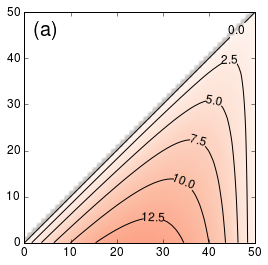

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import comb

% matplotlib inline

# Explores the combinatorial space
sample_size = np.arange(1, 51, 1)
obs_size = np.arange(1, 51, 1)
combin_space = np.array([[comb(n, r) for r in obs_size] for n in sample_size])
combin_space[combin_space == 0] = np.nan

manual_locations = [(3.6, 4.25), (5.4, 11.5), (8.25, 16), 
                    (12.2, 27), (15, 35), (22, 45)]

fig1 = plt.figure()
ax1 = fig1.add_axes((0.1, 0.1, 0.8, 0.8))
ax1.imshow(np.log10(combin_space), interpolation='bilinear', origin='lower', 
               cmap='Reds', extent=(0, 50, 0, 50), alpha=0.9, vmin=0, vmax=40)
CS = ax1.contour(sample_size, obs_size, np.log10(combin_space), np.arange(0, 40, 2.5),
                 colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f', manual=manual_locations, size=12)
ax1.plot([0, 2.2], [0, 2.2], 'k')
ax1.plot([5.5, 55], [5.5, 55], 'k-')

ax1.set_ylim([50, 0])
ax1.set_xlim([50, 0])

ax1.set_xticklabels([50, 40, 30, 20, 10, 0], size=12)
ax1.set_yticklabels([50, 40, 30, 20, 10, 0], size=12)

ax1.text(48, 5, '(a)', size=20)

fig1.savefig('/Users/jwdebelius/Desktop/one_comb.pdf')

(50,)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [41]:
sample_size[(np.square(combin_space) > 10000).any(1)]

/Users/jwdebelius/.virtualenvs/power_play/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50])

In [50]:
obs_size[np.square(combin_space)[20] > 10000]

/Users/jwdebelius/.virtualenvs/power_play/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [122]:
np.nanmax(np.log10(combin_space) - np.log10(2500))

10.703843506129845

Based on this plot, I would want a sample size of atleast x to fully explore the combinatorial space we need...

## `subsample_power` Independent Samples
Let $X$ and $Y$ be two independent samples of size $M$ and $N$. We can draw subsamples of sizes $r$ and $q$, respectively ($r < M$, $q < N$), to return subsamples $x_{r}$ and $x_{q}$ of sizes $_{M}C_{r}$ and $_{N}C_{s}$, respectively. Since the samples are independent, the number of comparisons, $n_{c}$ we can generate should be 
$\begin{align*}
n_{c} &= \left ( _{M}C_{r} \right ) \left( _{N}C_{s} \right )\\
&= \left (\frac{M!}{r!\left(M - r \right )!} \right ) \left ( \frac{N!}{q!\left(N - q \right )!} \right )
\end{align*}\tag{2}$

If we assume samples are the same size, we're exploring the square of the combinatorial space.

In [123]:
np.nanmax(np.log10(np.square(combin_space)))

28.203567029603764

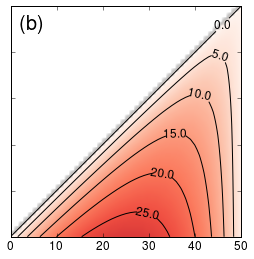

In [35]:
manual_locations = [(3.6, 4.25), (5, 12), (8.25, 16), (14, 30), (17, 35), (20, 42)]

fig2 = plt.figure()
ax2 = fig2.add_axes((0.1, 0.1, 0.8, 0.8))
ax2.imshow(np.log10(np.square(combin_space)), interpolation='bilinear', origin='lower', 
               cmap='Reds', extent=(0, 50, 0, 50), alpha=0.9, vmin=0, vmax=40)
CS = ax2.contour(sample_size, obs_size, np.log10(np.square(combin_space)), 
                 np.arange(0, 40, 5), colors='k')
plt.clabel(CS, fontsize=12, fmt='%1.1f', manual=manual_locations, size=12)
ax2.plot([0, 2.5], [0, 2.5], 'k')
ax2.plot([5.5, 50], [5.5, 50], 'k')

ax2.set_xlim([50, 0])
ax2.set_ylim([50, 0])

ax2.set_xticklabels([50, 40, 30, 20, 10, 0], size=12)
ax2.set_yticklabels('')

ax2.text(48, 5, '(b)', size=20)

fig2.savefig('/Users/jwdebelius/Desktop/two_eq_comb.pdf')

### np.nanmax(np.log10(combin_space2))

/Users/jwdebelius/.virtualenvs/power_play/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/jwdebelius/.virtualenvs/power_play/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


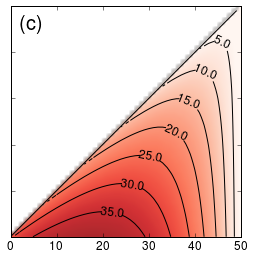

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import comb

% matplotlib inline

# Explores the combinatorial space
sample_size = np.arange(1, 51, 1)
obs_size = np.arange(1, 51, 1)
combin_space2 = np.array([[comb(n, r) * comb(n*2, r) for r in obs_size] for n in sample_size])
combin_space2[combin_space == 0] = np.nan

manual_locations = [(3.6, 4.25), (8.25, 16), (11.5, 22), (15, 30), (20, 35), (24, 42), (28, 45)]

fig1 = plt.figure()
ax1 = fig1.add_axes((0.1, 0.1, 0.8, 0.8))
I = ax1.imshow(np.log10(combin_space2) - np.log10(25000), interpolation='bilinear', origin='lower', 
               cmap='Reds', extent=(0, 50, 0, 50), alpha=0.9, vmin=0, vmax=40)
CS2 = ax1.contour(sample_size, obs_size, np.log10(combin_space2), 
                  np.arange(0, 40, 5), colors='k')
plt.clabel(CS2, fontsize=12, fmt='%1.1f', manual=manual_locations, size=12)
ax1.plot(obs_size, sample_size, 'k')

ax1.set_xlim([50, 0])
ax1.set_ylim([50, 0])
ax1.set_xticklabels([50, 40, 30, 20, 10, 0], size=12)
ax1.set_yticklabels('')

ax1.text(48, 5, '(c)', size=20)

# plt.colorbar(I)

fig1.savefig('/Users/jwdebelius/Desktop/comb_uneven_2.pdf')

# `subsample_paired_power` 

The combinatorial space occupied by `subsample_paired_power` is slightly more complicated than the implementation for the traditional power method. 
In general, we have a multi-factorial design, where we have $I$ control groups and $J$ treatments. The samples in each of the treatments are independent. So, we'll generally assume we're working with the $j$th treatment group, unless otherwise noted. There are $n_{ij}$ observations in each control group-treatment pair, and we can draw a maximum of $r_{i}$ observations from the group, where

$\begin{align*}
r_{i} = \textrm{min} \left (n_{ij} \right )
\end{align*}\tag{3}$

In total, we can draw $R$ observations.

$\begin{align*}
R = \sum_{i=1}^{I}{r_{i}}
\end{align*}\tag{4}$

Let's assume we plan to draw $Q$ observations in total ($1 \leq Q \leq R$) We'll draw $q_{i}$ observations ($p_{i} \leq q_{i} \leq r_{i}$) from each group. 
$\begin{align*}
p_{i} = \textrm{min} \left ( \textrm{max}\left (0, Q - \sum{r_{i}}\right ), r_{i} \right )
\end{align*}\tag{5}$

$\begin{align*}
Q = \sum_{i=1}^{I}{q_{i}}
\end{align*}\tag{6}$

For some solution to $Q$, $\{q_{x1}, q_{x2}, ... q_{xI} \}$, there are $_{n_{ij}}C_{q_{xi}}$ ways to draw $q_{xi}$ samples from the $i$th control group and the $j$th treatment. Each of the treatment groups are independent, so can multiple their combinations. So, the possible combinations for the $x$th solution and the $i$th treatment group, $C_{xi}$ is
$\begin{align*}
C_{xi} = \prod_{j=1}^{J}{_{n_{ij}}C_{q_{xi}}}
\end{align*}\tag{7}$
Once the group sizes are set, the ways the sample are drawn for each observations are independent. So, the possible number of combinations are
$\begin{align*}
C_{x} &= \prod_{i=1}^{I}{C_{xi}}\\
&= \prod_{i=1}^{I}{\prod_{j=1}^{J}{_{n_{ij}}C_{q_{xi}}}}
\end{align*}\tag{8}$

Now, let's turn our attention to how we optimize the $q_{xi}$ space. There are a finite number of values of $q_{i}$ which will satisfy the limits imposed by equations \ref{eq:def_littler}, \ref{eq:pi} and \ref{eq:def_bigq}. These create boundary conditions conditions where

$\begin{matrix}
p_{1} &\leq q_{1} &\leq & r_{1}\\ 
p_{2} &\leq q_{2} &\leq & \textrm{min} \left (Q-r_{1}, r_{2} \right )\\ 
p_{i} &\leq q_{i} &\leq & \textrm{min} \left (Q - \sum_{x=1}^{i}r_{x}, r_{i}, Q \right )
\end{matrix}\tag{9}$

So, to get the total number of combinations, $C_{all}$, we sum over the $i-1$ boundary conditions where the number of samples are not fixed. For example, for a model where the samples are divide between two control groups, the combinatorial space would be 
$\begin{align*}
C_{all} = \sum_{q_{1} = p}^{r_{1}}{\prod_{j=1}^{J}{\left (_{n_{1j}}C_{q_{1}}\right ) \left ( _{n_{2j}}C_{Q - q_{1}} \right )}}
\end{align*}\tag{10}$
For three groups, the total combinatorial space would be 
$\begin{align*}
C_{all} = \sum_{q_{1} = p}^{r_{1}}{\sum_{q_{2} = p}^{r_{2}}}{\prod_{j=1}^{J}{\left (_{n_{1j}}C_{q_{1}}\right ) \left (_{n_{2j}}C_{q_{2}} \right ) \left ( _{n_{3j}}C_{Q - q_{1} - q_{2}} \right )}}
\end{align*}\tag{11}$

We're going to start by implementing a two-group sample with even sized groups, since this is a simple case.

In [6]:
def paired_subsample_comb_2(num_samples_per_group, num_observations, num_treats):
    combs = np.zeros((len(num_samples_per_group), len(num_observations)))
    for idx, n in enumerate(num_samples_per_group):
        for idy, r in enumerate(num_observations):
            q1_min = np.min((np.max((r -n, 0)), n))
            q1_max = np.min((n, r)) + 1
            comb1 = np.array([
                    np.power(comb(n, q1), num_treats) * np.power(comb(n, r-q1), num_treats)
                    for q1 in np.arange(q1_min, q1_max)
                ]).sum()
            combs[idx, idy] = comb1
    return combs

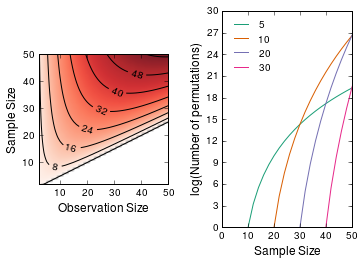

In [38]:
sample_size = np.arange(1, 51, 1)
obs_size = np.arange(1, 51, 1)
meta_space = paired_subsample_comb_2(sample_size, obs_size, 2)
meta_space[meta_space == 0] = np.nan
meta_obs_draw = [9, 19, 29, 39]
linemap = np.array([[  27/255., 158/255., 119/255.],
                            [ 217/255.,  95/255.,   2/255.],
                            [ 117/255., 112/255., 179/255.],
                            [ 231/255.,  41/255., 138/255.],
                            [ 102/255., 166/255.,  30/255.],
                            [ 230/255., 171/255.,   2/255.]])
labels = ['%i' % obs_size[i] for i in obs_draw]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

man = [(8, 8), (14, 15), (20, 22), (24, 28), (30, 35), (38, 42)]

ax1.set_position((0.125, 0.125, 0.3, 0.75))
ax2.set_position((0.55, 0.125, 0.3, 0.75))

upper = np.ceil(np.nanmax(np.log10(meta_space)))

ax1.imshow(np.log10(meta_space), interpolation='bilinear', origin='lower', 
               cmap='Reds', extent=(1, 50, 1, 50), alpha=0.9)
CS = ax1.contour(sample_size, obs_size, np.log10(meta_space), 
                     V=np.arange(10, upper, 10), colors='k')
plt.clabel(CS, fontsize=10, fmt='%i', manual=man)
ax1.plot(2*sample_size, obs_size, 'k')
ax1.set_xlim([2, 50])
ax1.set_ylim([2, 50])
ax1.set_xlabel('Observation Size', size=12)
ax1.set_ylabel('Sample Size', size=12)
ax1.set_aspect('equal')
ax1.set_xticklabels(map(int, ax1.get_xticks()))
ax1.set_yticklabels(map(int, ax1.get_yticks()))

for (i, l) in zip(*[meta_obs_draw, linemap]):
    ax2.plot(2*sample_size, meta_space[:, i], color=l)
ax2.semilogy()
ax2.set_xlim([0, 50])
ax2.set_ylim([0, np.exp(69)])
ax2.set_xticklabels(map(int, ax2.get_xticks()))
ax2.set_yticklabels(np.arange(-3, 31, 3))
ax2.set_xlabel('Sample Size', size=12)
ax2.set_ylabel('log(Number of permutations)', size=12)
l = ax2.legend(labels, loc=2, frameon=False, fontsize=10)
fig.savefig('/Users/jwdebelius/Desktop/meta_space.png')

Let's imagine a 
The combinatorial space for this method a bit more challenging. Samples are matched so that all samples in a group are the same based on `control_cats`, but grouped to vary, based on the category being varied (`category`).
So, if we grouped by **SEX** and **AGE_CAT**, but vary by disease status, **STATUS**, we might get a table of results like this:

|No. |   Group    |        Case          | Control |
|----|------------|----------------------|---------|
| 1 |(Female, 20s)|$S_{01}, S_{02}, S_{03}$                 | $S_{21}, S_{22}$ |
| 2 |(Female, 30s)|$S_{04}, S_{05}$                         | $S_{23}, S_{24}, S_{25}, S_{26}$ |
| 3 |(Female, 40s)|$S_{06}, S_{07}, S_{08}, S_{09}$         | $S_{27}, S_{28}, S_{29}, S_{30}, S_{31}, S_{32}$ |
| 4 |(Male, 20s)  |$S_{10}, S_{11}, S_{12}, S_{13}, S_{14}$ | $S_{33}, S_{34}, S_{35}, S_{36}$ |
| 5 |(Male, 30s)  |$S_{15}, S_{16}, S_{17}, S_{18}, S_{19}$ | $S_{37}, S_{38}$ |
| 6 |(Male, 50s)  |$S_{20}$                                 | $S_{39}, S_{40}$ |

This is an example of five control groups, so the combinatorial space is given by
$\begin{align*}
    C_{all} = \sum_{q_{1}=p_{1}}^{m_{1}} \sum_{q_{2}=p_{2}}^{m_{2}} \sum_{q_{3}=p_{3}}^{m_{3}} \sum_{q_{4}=p_{4}}^{m_{4}} \sum_{q_{5}=p_{5}}^{m_{5}} \prod_{j=1}^{J} {\left(_{n_{1j}}C_{q_{1}} \right ) \left(_{n_{2j}}C_{Q - q_{1}} \right ) \left(_{n_{3j}}C_{Q-q_{1}-q{2}} \right ) \left(_{n_{4j}}C_{Q-q_{1}-q_{2}-q_{3}} \right ) \left(_{n_{5j}}C_{Q-q_{1}-q_{2}-q_{3}-q_{4}} \right )}
\end{align*}\tag{12}$
where
$\begin{align*}
m_{i} = \textrm{max} \left ( \textrm{min} \left (Q - \sum_{x=1}^{i}r_{x}, r_{i} \right ), p_{i} \right )
\end{align*}\tag{13}$

Let's imagine that we wish to draw five observations from each sample for this population. I'd like to determine the number of possible combinations which can be drawn for this set of observations.


In [80]:
q = 3
groups = np.array([[3, 2], [2, 4], [4, 6], [5, 4], [5, 2], [1, 2]])
ri = groups.min(1)
pi = np.zeros(len(groups)).astype(int)
for i, r in enumerate(ri):
    print np.max((np.min((q-ri[:i].sum(), 
#     print min(ri, q-ri[:i-1].sum())
# mi = np.array([np.min(ri[i], q-ri[:(i-1)].sum()) for i in xrange(5)])
# print mi
# mi = np.array([np.max(np.min(ri[i], q - ri[:(i-1)].sum()), ri[i]) for i in xrange(len(ri))])
# print mi

ValueError: setting an array element with a sequence.

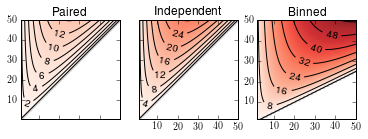

In [9]:
all_fig = plt.figure()
ax1 = all_fig.add_subplot(2, 3, 1)
ax2 = all_fig.add_subplot(2, 3, 2)
ax3 = all_fig.add_subplot(2, 3, 3)

ax1.imshow(np.log10(combin_space), interpolation='bilinear', origin='lower', 
           cmap='Reds', extent=(1, 50, 1, 50), alpha=0.9, vmin=0, vmax=60)
CS = ax1.contour(sample_size, obs_size, np.log10(combin_space), 
                 V=np.arange(10, upper, 10), colors='k')
plt.clabel(CS, fontsize=10, fmt='%i', manual=manual_locations)
ax1.plot(obs_size, sample_size, 'k')
ax2.imshow(np.log10(np.square(combin_space)), interpolation='bilinear', origin='lower', 
           cmap='Reds', extent=(1, 50, 1, 50), alpha=0.9, vmin=0, vmax=60)
CS = ax2.contour(sample_size, obs_size, np.log10(np.square(combin_space)), 
                 V=np.arange(10, upper, 10), colors='k')
plt.clabel(CS, fontsize=10, fmt='%i', manual=manual_locations)
ax2.plot(obs_size, sample_size, 'k')
ax3.imshow(np.log10(meta_space), interpolation='bilinear', origin='lower', 
           cmap='Reds', extent=(1, 50, 1, 50), alpha=0.9, vmin=0, vmax=60)
CS = ax3.contour(sample_size, obs_size, np.log10(meta_space), 
                     V=np.arange(10, upper, 10), colors='k')
plt.clabel(CS, fontsize=10, fmt='%i', manual=man)
ax3.plot(2*sample_size, obs_size, 'k')
ax3.set_xlim([2, 50])
ax3.set_ylim([2, 50])
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')

ax1.set_xticklabels('')
ax2.set_yticklabels('')

ax1.set_title('Paired')
ax2.set_title('Independent')
ax3.set_title('Binned')

all_fig.savefig('/Users/jwdebelius/Desktop/comparative_topo.png')

In [10]:
help(ax1.imshow)

Help on method imshow in module matplotlib.axes._axes:

imshow(self, X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Display an image on the axes.
    
    Parameters
    -----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be a float
        array, a uint8 array or a PIL image. If `X` is an array, it
        can have the following shapes:
    
        - MxN -- luminance (grayscale, float array only)
        - MxNx3 -- RGB (float or uint8 array)
        - MxNx4 -- RGBA (float or uint8 array)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0; MxN float arrays may be
        normalised.
    
    cmap : `~matplotlib.colors.Colormap`,

In [11]:
def paired_subsample_comb_2(num_samples_per_group, num_observations, num_treats):
    combs = np.zeros((len(num_samples_per_group), len(num_observations)))
    for idx, n in enumerate(num_samples_per_group):
        for idy, r in enumerate(num_observations):
            q1_min = np.min((np.max((r -n, 0)), n))
            q1_max = np.min((n, r)) + 1
            comb1 = np.array([
                    np.power(comb(n, q1), num_treats) * np.power(comb(n, r-q1), num_treats)
                    for q1 in np.arange(q1_min, q1_max)
                ]).sum()
            combs[idx, idy] = comb1
    return combs